# CellSystem

> Let cells do their own thing while you silently observe them.

A simple framework that allows (or will allow) you to couple seamlessly a custom observer (logger) to your simulations.

This was created to simulate cancer growth, while allowing to couple mutations and ancestry logging to study tumour philogeny reconstruction algorithms.

![Use case](sidebyside.png)

## Example

A use case integrated in the repository:

In [98]:
from cellsystem import *

# The cell system will simulate cell growth
# while the log tracks the steps in that process.
sys = CellSystem()
log = FullLog()

In [99]:
# Initialize the first cell
sys.seed(log=log)

New cell 0 added @ (5, 5)


In [100]:
# Take 35 steps forward in time
sys.step(30, log=log)

Cell no. 0 dividing @ (5, 5)
	New cells: 2 @ (4, 5) and 1 @ (6, 6)
Cell no. 2 mutating @ site (4, 5) (father 0)
		 Initial mutations: []
                	 Initial genome: AAAAAAAAAA
		 Final mutations: [(3, 'C')]
                	 Final genome: AAACAAAAAA
Cell no. 1 dividing @ (6, 6)
	New cells: 4 @ (6, 6) and 3 @ (5, 6)
Cell no. 2 death @ site (4, 5) (father 0)
Cell no. 3 migrating from site (5, 6) (father 1)
	 New site: (4, 5)
Cell no. 4 death @ site (6, 6) (father 1)
Cell no. 3 dividing @ (4, 5)
	New cells: 6 @ (3, 6) and 5 @ (3, 5)
Cell no. 6 dividing @ (3, 6)
	New cells: 8 @ (2, 6) and 7 @ (3, 5)
Cell no. 5 migrating from site (3, 5) (father 3)
	 New site: (4, 5)
Cell no. 8 dividing @ (2, 6)
	New cells: 10 @ (3, 6) and 9 @ (1, 7)
Cell no. 7 mutating @ site (3, 5) (father 6)
		 Initial mutations: [(3, 'C')]
                	 Initial genome: AAACAAAAAA
		 Final mutations: [(3, 'C'), (6, 'C')]
                	 Final genome: AAACAACAAA
Cell no. 5 death @ site (4, 5) (father 3)
Cell n

In [111]:
from ete3 import TreeStyle
ts = TreeStyle()
ts.show_leaf_name = True
ts.mode = "c"
ts.arc_start = -135 # 0 degrees = 3 o'clock
ts.arc_span = 270

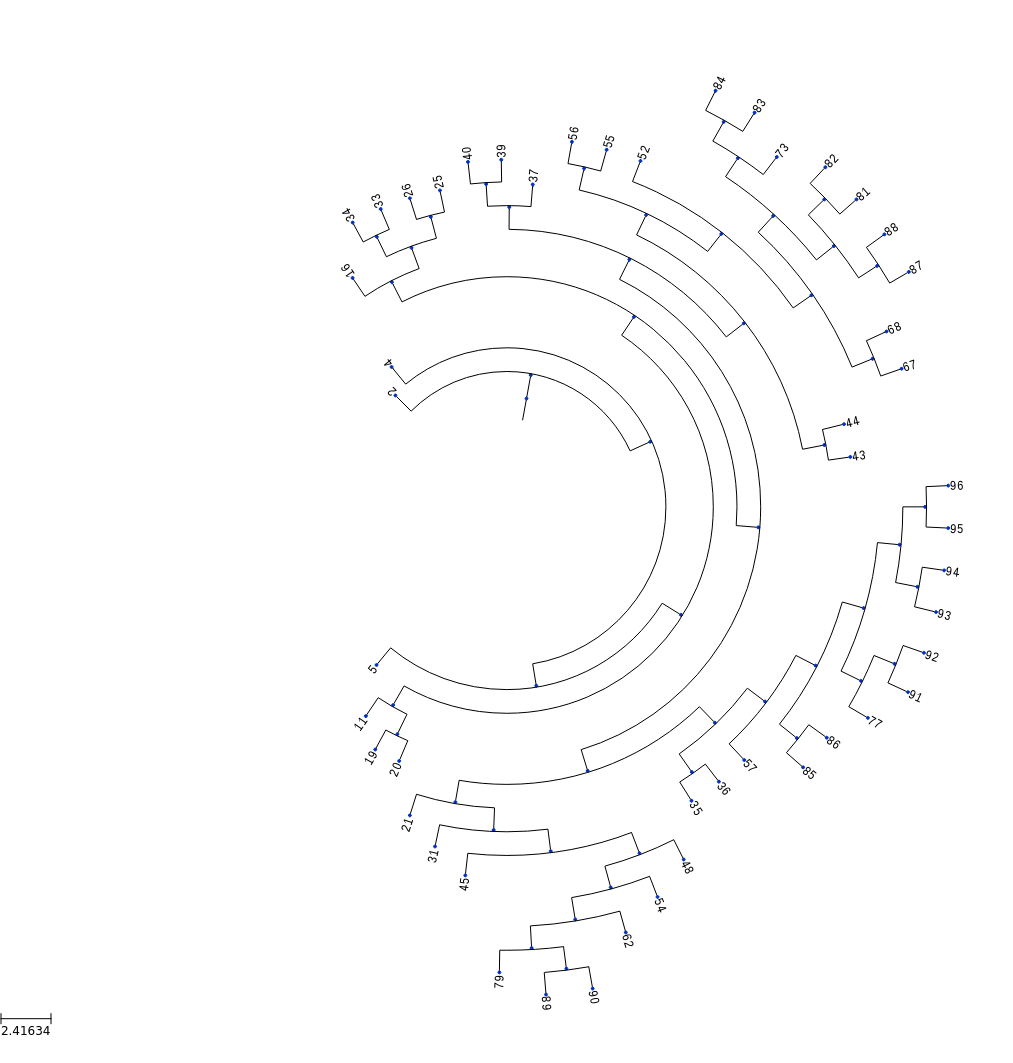

In [112]:
# Lookup the tree formed by cellular division
log.ancestry().render('%%inline', tree_style=ts)

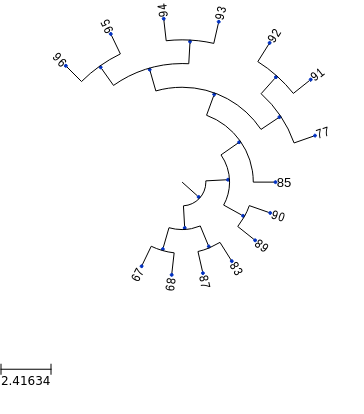

In [113]:
# Now, remove cells that are no longer alive
log.ancestry(prune_death=True).render('%%inline', tree_style=ts)

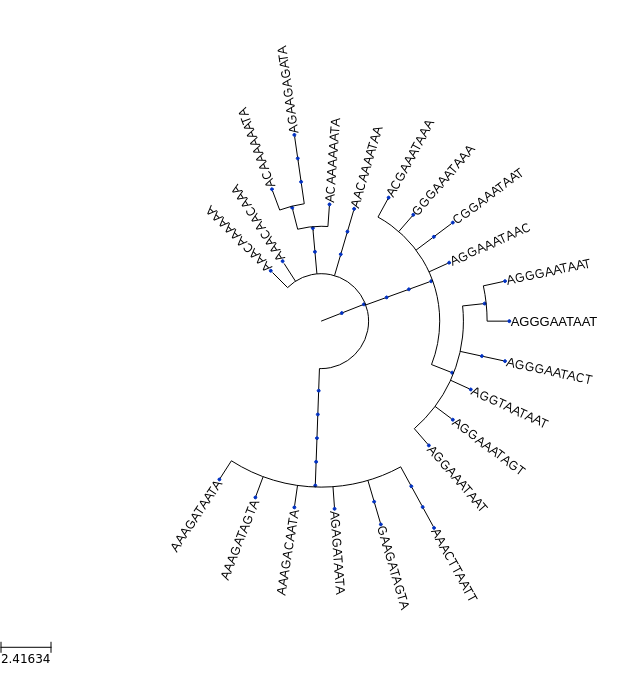

In [114]:
# Now, check out the tree formed by the mutations 
log.mutations().render('%%inline', tree_style=ts)

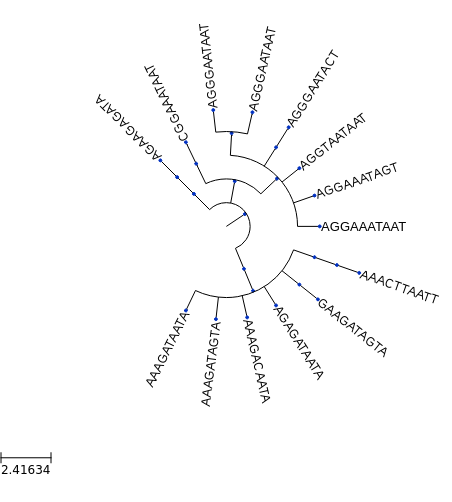

In [115]:
# Remove genomes whose representatives are no longer alive
log.mutations(prune_death=True).render('%%inline', tree_style=ts)

_For more examples and usage, please refer to the [Wiki](wikigoeshere.com)._

## Meta

Ad115 – [@Andresio115](https://twitter.com/Andresio115) – a.garcia230395@gmail.com

Distributed under the MIT license. See [LICENSE](LICENSE) for more information.

## Contributing

1. Fork it (<https://github.com/Ad115/Cell-System/fork>)
2. Create your feature branch (`git checkout -b feature/fooBar`)
3. Commit your changes (`git commit -am 'Add some fooBar'`)
4. Push to the branch (`git push origin feature/fooBar`)
5. Create a new Pull Request